In [1]:
import cwgp
import warnings

print(cwgp)

from cwgp.cwgp import CWGP
from cwgp.transformations import sal,sa,asinh,box_cox
import seaborn as sns
import autograd.numpy as np

<module 'cwgp' from '/home/chen/work/venv/lib/python3.6/site-packages/cwgp/__init__.py'>


In [2]:
betas = np.random.exponential(scale=5,size=100)
test_betas = np.random.exponential(scale=5,size=100)
betas = betas[np.newaxis].reshape(-1,1)

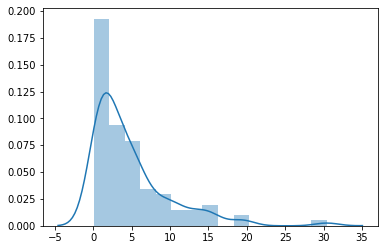

In [3]:
sns.distplot(betas)

# SAL d=1

/home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
/home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/chen/work/venv/lib/python3.6/site-packages/cwgp/kernel.py:5: RuntimeWarning: invalid value encountered in matmul
  return np.exp(-gamma * np.abs(np.log(np.exp(x) @ np.exp(-(y)))))
/home/chen/work/venv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in sinh
  return f_raw(*args, **kwargs)
/home/chen/work/venv/lib/python3.6/

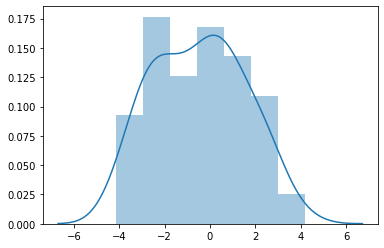

In [4]:
compgp = CWGP(sal, betas, transformations=1)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Arcsinh d=1

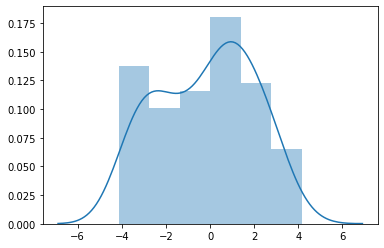

In [5]:
compgp = CWGP(asinh, betas, transformations=1)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Sinh-Arcsinh d=3

/home/chen/work/venv/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:91: RuntimeWarning: overflow encountered in square
  defvjp(anp.arcsinh, lambda ans, x : lambda g: g / anp.sqrt(x**2 + 1))
/home/chen/work/venv/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:91: RuntimeWarning: invalid value encountered in true_divide
  defvjp(anp.arcsinh, lambda ans, x : lambda g: g / anp.sqrt(x**2 + 1))
/home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
/home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
/home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:405: RuntimeWarning: 

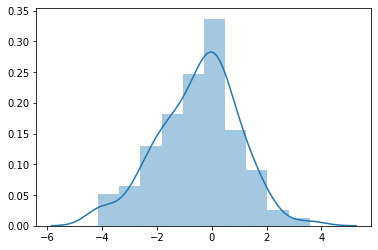

In [6]:
compgp = CWGP(sa, betas, transformations=3)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Box-Cox d=2

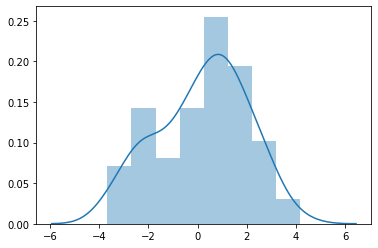

In [7]:
compgp = CWGP(box_cox, betas, transformations=2)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

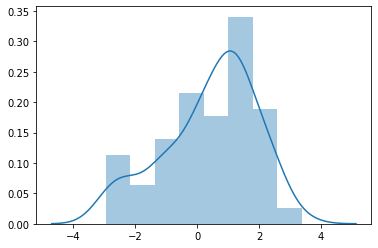

In [8]:
compgp.phi.y = test_betas
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)